In [5]:
import numpy as np
import pandas as pd

In [6]:
# load csv files as datframes
accounts = pd.read_csv('twm_accounts.csv', sep = ';',)
checking_acct = pd.read_csv('twm_checking_acct.csv', sep = ';')
checking_tran = pd.read_csv('twm_checking_tran.csv')
credit_acct = pd.read_csv('twm_credit_acct.csv', sep = ';')
credit_tran = pd.read_csv('twm_credit_tran.csv', sep = ';')
customer = pd.read_csv('twm_customer.csv')
savings_acct = pd.read_csv('twm_savings_acct.csv')
savings_tran = pd.read_csv('twm_savings_tran.csv', sep = ';')
transaction = pd.read_csv('twm_transactions.csv')

In [7]:
#total saved
savings_acct['total_saved'] =  savings_acct['ending_balance'] - savings_acct['starting_balance']

In [8]:
#merge to customer list
df_bnk_behav = customer.merge(savings_acct[['cust_id', 'account_active','total_saved']].rename(columns={'account_active':'savings_account'}),
                                 left_on = 'cust_id',
                                 right_on = 'cust_id',
                                 how = 'left')

In [9]:
# fill missing values
df_bnk_behav['total_saved'].fillna(0, inplace=True)

In [10]:
df_bnk_behav

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code,savings_account,total_saved
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV,NaN,0.00
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA,N,-638.84
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA,Y,9.50
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA,Y,9.07
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY,Y,3.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,14795,36,6,1,F,4,,Lillian ...,Kaufman ...,9677,B ...,90016,Los Angeles,CA,NaN,0.00
743,1362895,26387,56,6,1,M,2,,Marty ...,McSherry ...,3227,Inspiration ...,10126,New York City,NY,Y,-73.71
744,1362569,61300,50,0,2,M,2,,Ken ...,Lawrence ...,6082,23rd ...,87194,Albuquerque,NM,NaN,0.00
745,1363364,15100,37,7,0,F,2,,Debbie ...,Runner ...,7851,H ...,35241,Birmingham,AL,NaN,0.00


In [11]:
# load credit accounts
df_credit_accounts = pd.read_csv('twm_credit_acct.csv', sep=';')

In [12]:
# client balance
df_credit_accounts['credit_diff'] =  df_credit_accounts['ending_balance'] - df_credit_accounts['starting_balance']

In [13]:
# merge
df_bnk_behav = df_bnk_behav.merge(df_credit_accounts[['cust_id', 'account_active',
                                                      'credit_diff','credit_limit']].rename(columns={'account_active':'credit_account'}),
                                  left_on = 'cust_id',
                                  right_on = 'cust_id',
                                  how = 'left')

In [14]:
# map values
df_bnk_behav['credit_account'] = df_bnk_behav['credit_account'].str.strip()\
                                                                   .replace({np.nan: 'dont_have',
                                                                            'Y': 'active',
                                                                            'N': 'inactive'})

In [15]:
df_bnk_behav

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code,savings_account,total_saved,credit_account,credit_diff,credit_limit
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV,NaN,0.00,dont_have,NaN,NaN
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA,N,-638.84,active,1548.23,3000.0
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA,Y,9.50,active,-370.77,1000.0
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA,Y,9.07,inactive,-2302.14,2400.0
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY,Y,3.78,active,-6896.57,6700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,14795,36,6,1,F,4,,Lillian ...,Kaufman ...,9677,B ...,90016,Los Angeles,CA,NaN,0.00,dont_have,NaN,NaN
743,1362895,26387,56,6,1,M,2,,Marty ...,McSherry ...,3227,Inspiration ...,10126,New York City,NY,Y,-73.71,active,1300.00,1300.0
744,1362569,61300,50,0,2,M,2,,Ken ...,Lawrence ...,6082,23rd ...,87194,Albuquerque,NM,NaN,0.00,active,9200.00,9200.0
745,1363364,15100,37,7,0,F,2,,Debbie ...,Runner ...,7851,H ...,35241,Birmingham,AL,NaN,0.00,inactive,2.11,3000.0


In [16]:
# fill missing values
df_bnk_behav['credit_limit'].fillna(0, inplace=True)
df_bnk_behav['credit_diff'].fillna(0, inplace=True)

In [17]:
df_bnk_behav

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code,savings_account,total_saved,credit_account,credit_diff,credit_limit
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV,NaN,0.00,dont_have,0.00,0.0
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA,N,-638.84,active,1548.23,3000.0
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA,Y,9.50,active,-370.77,1000.0
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA,Y,9.07,inactive,-2302.14,2400.0
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY,Y,3.78,active,-6896.57,6700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,14795,36,6,1,F,4,,Lillian ...,Kaufman ...,9677,B ...,90016,Los Angeles,CA,NaN,0.00,dont_have,0.00,0.0
743,1362895,26387,56,6,1,M,2,,Marty ...,McSherry ...,3227,Inspiration ...,10126,New York City,NY,Y,-73.71,active,1300.00,1300.0
744,1362569,61300,50,0,2,M,2,,Ken ...,Lawrence ...,6082,23rd ...,87194,Albuquerque,NM,NaN,0.00,active,9200.00,9200.0
745,1363364,15100,37,7,0,F,2,,Debbie ...,Runner ...,7851,H ...,35241,Birmingham,AL,NaN,0.00,inactive,2.11,3000.0


In [18]:
# load transactions
df_transactions = pd.read_csv('twm_transactions.csv')

In [19]:
df_transactions

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,27,1.362562e+07,0.00,0.00,0.0,3753.34,21.10.1995,121656,A,IQ
1,97,1.362839e+07,0.00,0.00,0.0,254.49,5.2.1995,153053,V,IQ
2,21,1.363084e+07,-97.57,-97.57,0.0,3819.56,23.7.1995,0,P,WD
3,44,1.363141e+07,-0.15,-0.15,0.0,224.05,30.1.1995,0,,FK
4,31,1.362572e+07,0.00,0.00,0.0,240.55,25.1.1995,204521,B,IQ
...,...,...,...,...,...,...,...,...,...,...
77575,77,1.363175e+07,-95.71,-95.71,0.0,95.71,14.2.1995,161001,A,TR
77576,94,1.362677e+07,-93.90,-93.90,0.0,824.36,11.3.1995,0,P,WD
77577,42,1.362526e+07,-10.35,-10.35,0.0,10.36,26.8.1995,0,P,WD
77578,98,1.362705e+07,-423.80,-423.80,0.0,162.28,13.6.1995,110209,E,WD


In [20]:
# we need to have customer_id column in transcations to merge on customers
df_transactions = df_transactions.merge(accounts[['acct_nbr','cust_id']], 
                                        left_on = 'acct_nbr',
                                        right_on = 'acct_nbr',
                                        how = 'inner')

In [21]:
df_transactions

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code,cust_id
0,27,13625623.0,0.00,0.00,0.00,3753.34,21.10.1995,121656,A,IQ,1362562
1,39,13625623.0,140.63,140.63,0.00,3859.95,27.12.1995,170033,B,DP,1362562
2,2,13625623.0,0.49,0.00,0.49,392.94,28.2.1995,235959,,IN,1362562
3,14,13625623.0,-120.00,-120.00,0.00,2253.68,6.8.1995,204727,A,WD,1362562
4,26,13625623.0,-140.00,-140.00,0.00,3753.34,21.10.1995,121543,A,WD,1362562
...,...,...,...,...,...,...,...,...,...,...,...
57388,23,13629413.0,0.00,0.00,0.00,1375.12,21.1.1995,155813,C,IQ,1362941
57389,24,13629413.0,-179.33,-179.33,0.00,1195.79,25.1.1995,191949,A,TR,1362941
57390,25,13629413.0,-192.83,-192.83,0.00,1002.96,30.1.1995,85156,B,TR,1362941
57391,26,13629413.0,1.25,0.00,1.25,1004.21,31.1.1995,235959,,IN,1362941


In [22]:
# load accounts
df_accounts = pd.read_csv('twm_accounts.csv', sep=';')

In [23]:
# compute summary stats from transactions
df_trans_grouped = df_transactions.groupby('cust_id').agg(avg_trans_amount = ('tran_amt', 'mean'),
                                                          total_trans_amount = ('tran_amt','sum'),
                                                          count_trans = ('tran_amt', 'count'))\
                                                      .reset_index()

In [24]:
df_trans_grouped

,cust_id,avg_trans_amount,total_trans_amount,count_trans
0,1362480,1.898640,237.33,125
1,1362484,-4.458182,-588.48,132
2,1362485,-1.659495,-164.29,99
3,1362486,-22.167200,-1108.36,50
4,1362487,-28.415915,-2017.53,71
...,...,...,...,...
620,1363490,2.853333,34.24,12
621,1363491,-10.423889,-187.63,18
622,1363492,-8.712823,-1080.39,124
623,1363493,-32.606017,-3847.51,118


In [25]:
# merge transactions stats on customers
df_bnk_behav = df_bnk_behav.merge(df_trans_grouped, 
                                  left_on='cust_id', 
                                  right_on = 'cust_id',
                                  how='inner')

In [26]:
# columns used in transaction segmentation
cols_to_use = ['savings_account', 'total_saved', 'credit_account', 'credit_diff',
               'credit_limit', 'avg_trans_amount', 'total_trans_amount','count_trans']
df_trans_seg = df_bnk_behav[cols_to_use]

In [27]:
df_trans_seg.dtypes

savings_account        object
total_saved           float64
credit_account         object
credit_diff           float64
credit_limit          float64
avg_trans_amount      float64
total_trans_amount    float64
count_trans             int64
dtype: object

In [28]:
# create dummy variables
df_trans_seg = pd.get_dummies(df_trans_seg, drop_first=True)

In [29]:
# import MiMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [30]:
# scaling
scaler = MinMaxScaler()

df_trans_seg_scaled = pd.DataFrame(scaler.fit_transform(df_trans_seg), columns = df_trans_seg.columns)

In [31]:
# import Kmeans 
from sklearn.cluster import KMeans

# import matplotlib
import matplotlib.pyplot as plt

In [32]:
# elbow rule
def plot_inertia(df):
    distortions = []
    for i in range(1, 11):
        km = KMeans(n_clusters=i,
                    n_init=10,
                    random_state=0)
        km.fit(df)
        distortions.append(km.inertia_)

    fig, ax = plt.subplots(figsize=(15,8))
    ax.plot(range(1,11), distortions, marker='o')
    ax.set_xlabel('Number of clusters')
    ax.set_ylabel('Distortion')
    ax.set_title('Elbow method')
    plt.show()

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


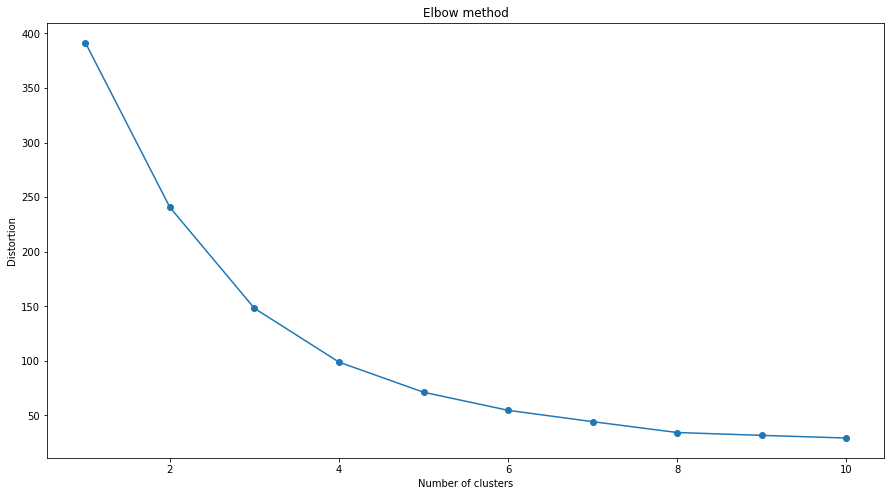

In [33]:
# elbow rule
plot_inertia(df_trans_seg_scaled)

In [34]:
# assign cluster to customers
df_trans_seg_scaled['cluster'] = KMeans(n_clusters=3, n_init=10).fit_predict(df_trans_seg_scaled)

In [35]:
# clusters size
df_trans_seg_scaled['cluster'].value_counts()

2    265
0    196
1    164
Name: cluster, dtype: int64

In [36]:
# data to radar chart
df_trans_radar = df_trans_seg_scaled.groupby('cluster').mean().divide(df_trans_seg_scaled.drop('cluster',axis=1).mean())*100

In [37]:
# import plotly
import plotly.graph_objects as go

In [38]:
# function that plots radar chart
def plot_radarchart(df):
    data = []
    for i in range(0,len(df)):
        data.append(go.Scatterpolar(r = df.iloc[i].values,
                                    theta = df.iloc[i].index,
                                    name = f'cluster{df.index[i]}',
                                    fill = 'toself'))


    layout = go.Layout(polar = dict(radialaxis = dict(visible = True)),
                       showlegend = True)
    fig = go.Figure(data = data, layout = layout)
    fig.show()

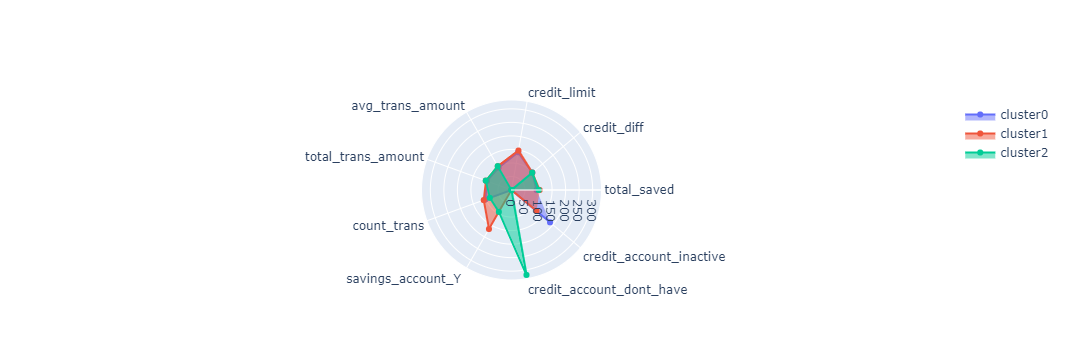

In [196]:
# plot radar chart
plot_radarchart(df_trans_radar)